In [1]:
!pip install imblearn

In [2]:
import imblearn
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

import warnings

warnings.filterwarnings('ignore')

In [3]:
col_Names=['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level','Bank Accounts Open', \
         'Overdraft Protection', 'Credit Rating','Credit Cards Held', 'Homes Owned', 'Household Size',
         'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance',  'Q3 Balance', 'Q4 Balance']
data = pd.read_csv('data_mid_bootcamp_project_classification/creditcardmarketing.csv', names=col_Names)
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [4]:
data.shape

(18000, 17)

In [5]:
data.describe()

,Customer Number,Bank Accounts Open,Credit Cards Held,Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [6]:
data.set_index('Customer Number')

,Offer Accepted,Reward,Mailer Type,Income Level,Bank Accounts Open,Overdraft Protection,Credit Rating,Credit Cards Held,Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
Customer Number,,,,,,,,,,,,,,,,
1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0


In [7]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [8]:
# Separating numerical variables
numerical = data.select_dtypes(np.number)
numerical.head()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0


In [9]:
# Checking the NaNs
# It looks like the only NaNs are in the numerical columns, that are only about the balance. I assume that they are NaNs
# because those customers have no balance in their bank account, so they can probably be replaced by 0s
data.isna().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [10]:
# Replace NaNs with 0s, as it they most probably mean that the customers are unemployed
# This loop didn't work, correct it
# columns = ['average_balance', 'q1_balance', 'q2_balance', 'q3_balance', 'q4_balance']
# for col in data[columns]:
#     data[columns][col].fillna('0', inplace=True)

In [11]:
data['average_balance'].fillna(0, inplace=True)
data['q1_balance'].fillna(0, inplace=True)
data['q2_balance'].fillna(0, inplace=True)
data['q3_balance'].fillna(0, inplace=True)
data['q4_balance'].fillna(0, inplace=True)
data.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

### EDA

#### Corr Matrix

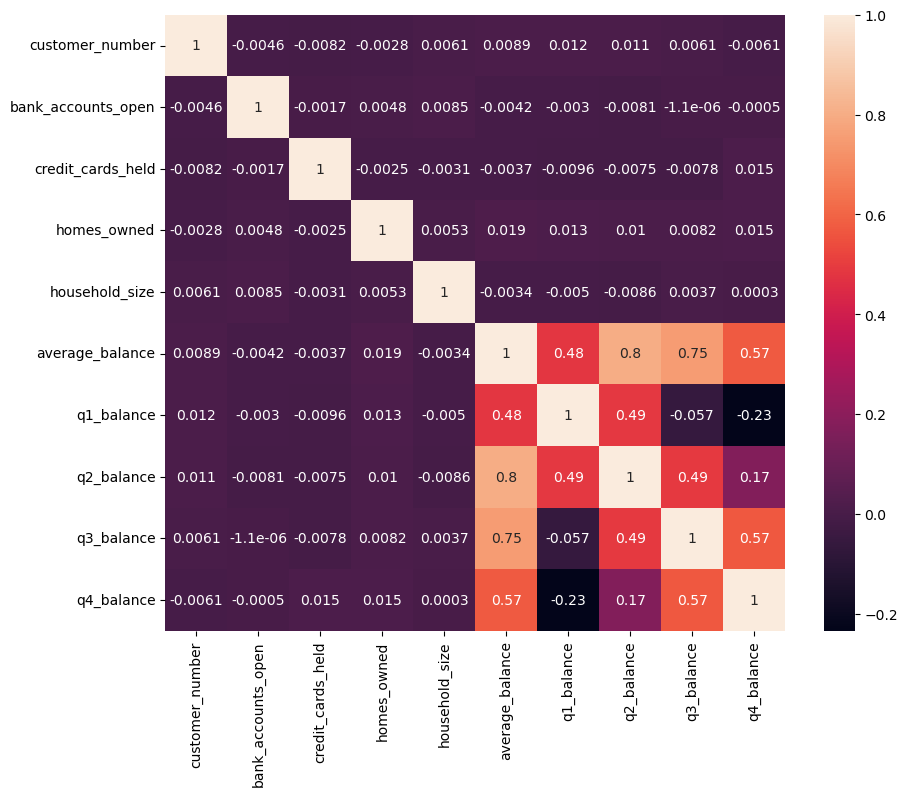

In [12]:
corr_matrix=data.corr(method='pearson')  # default

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# AVG blance and q2 balance have high correlation, dropping q2_balance

In [13]:
data = data.drop('q2_balance', axis=1)
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,982.0,365.0


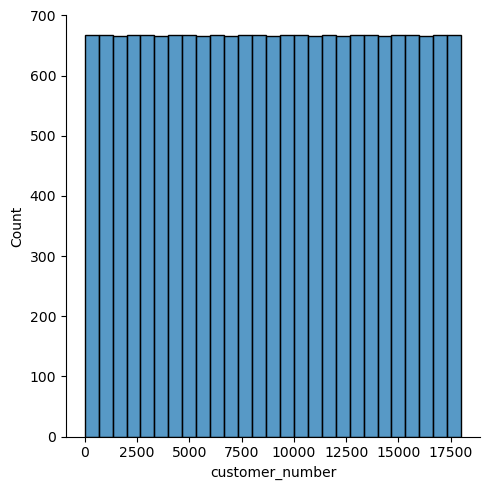

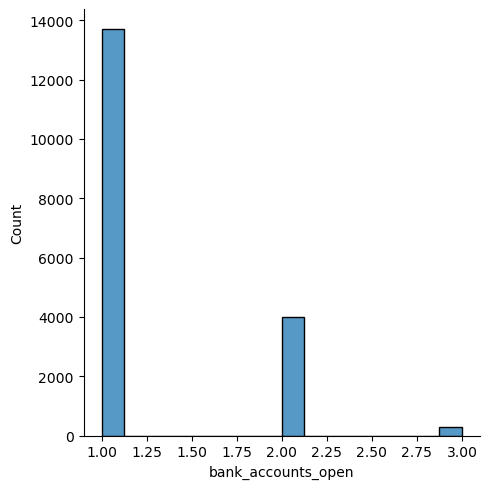

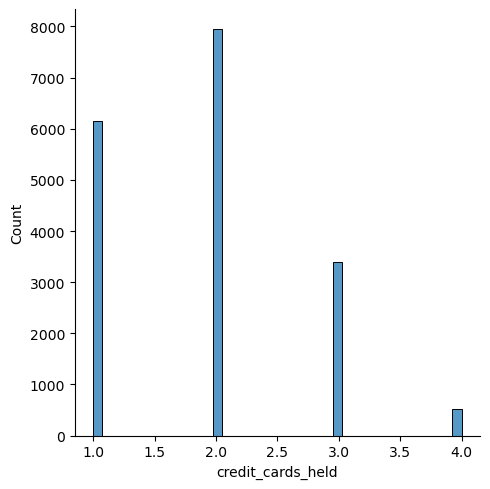

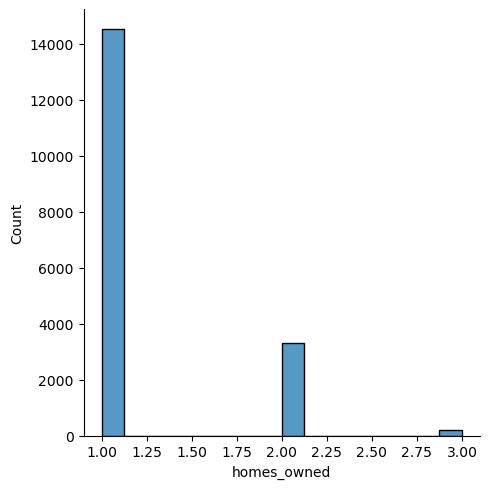

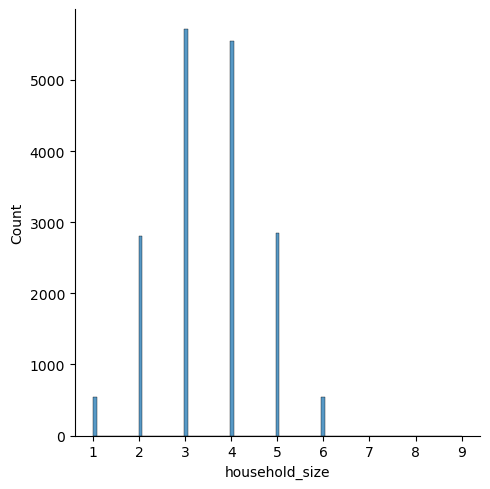

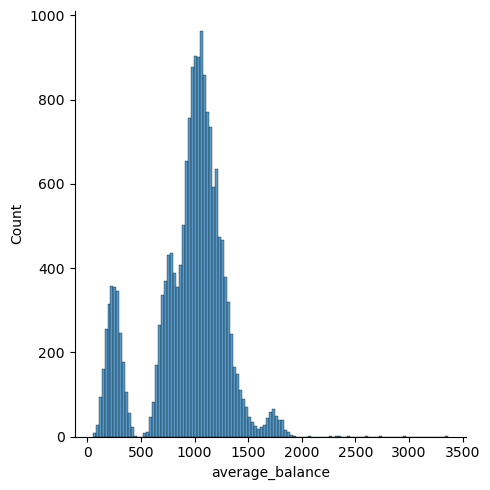

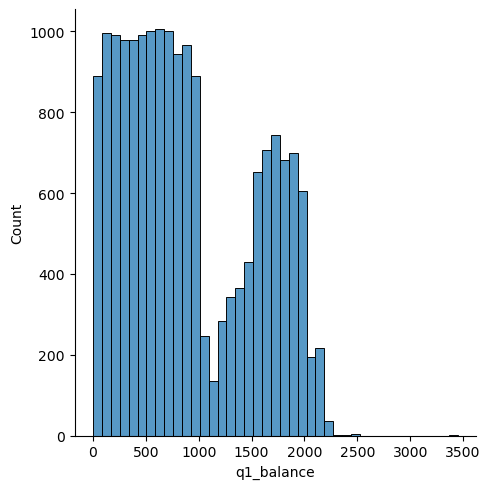

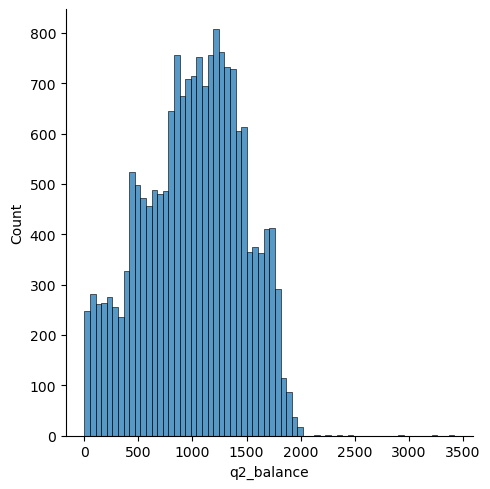

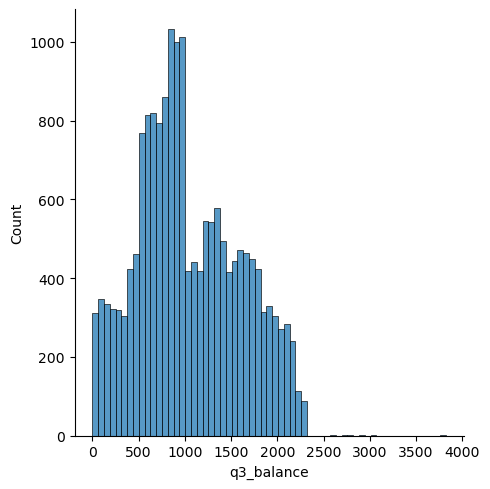

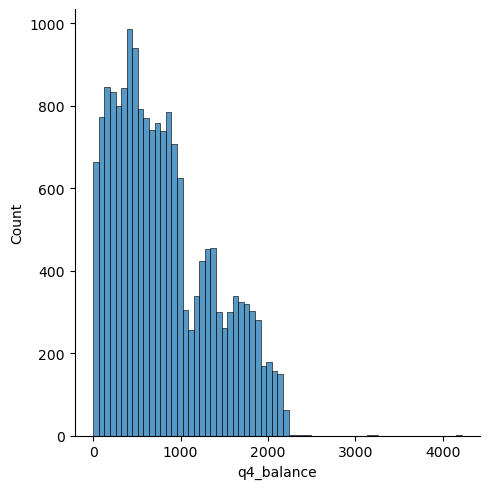

In [14]:
for col in numerical:
    sns.displot(numerical[col])
    plt.show()
    
# Most of the customers have:
    # 1 bank account
    # 2 cards
    # 1 home
    # A house size between 3 and 4
    # The average balance follows for the most part a normal distributions, with a spike in ~250 and some outliers
    # Most people in the first Quarter had between 0 and 1000 in their bank account
    # The trend got better in the second quarter
    # To get a bit worse in the third
    # And even worse in the last part of the year

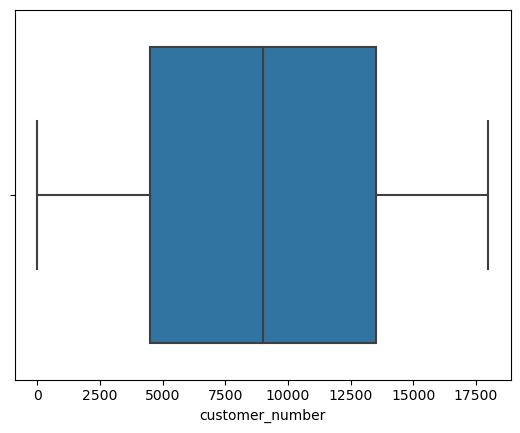

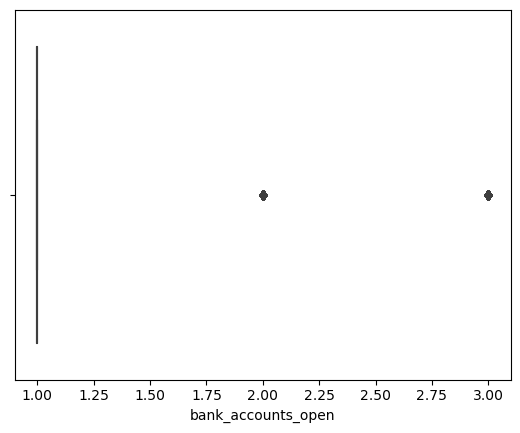

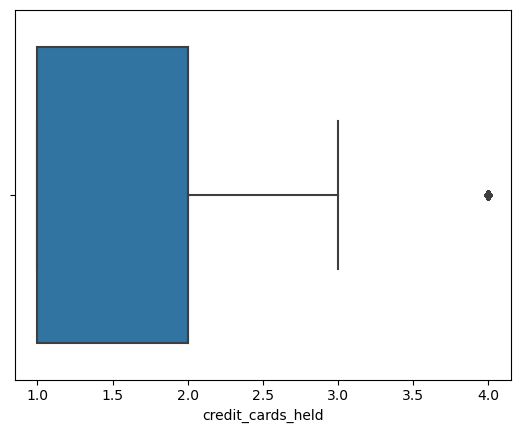

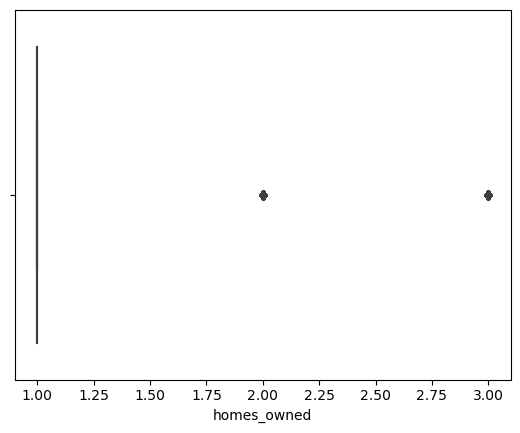

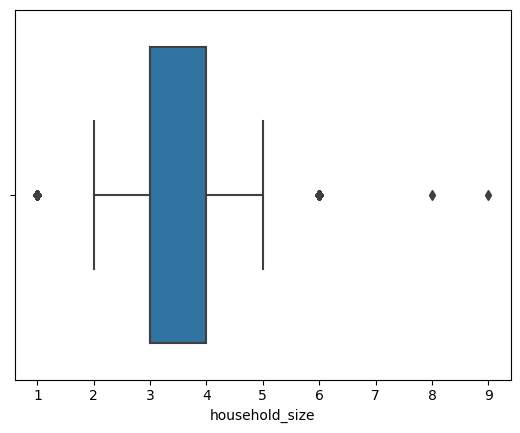

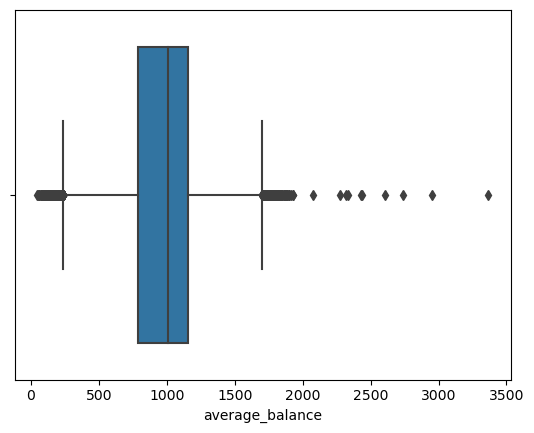

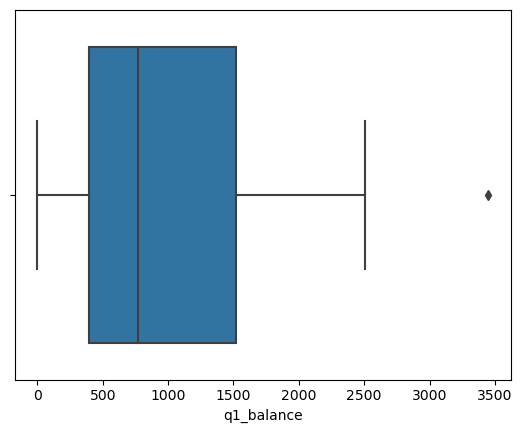

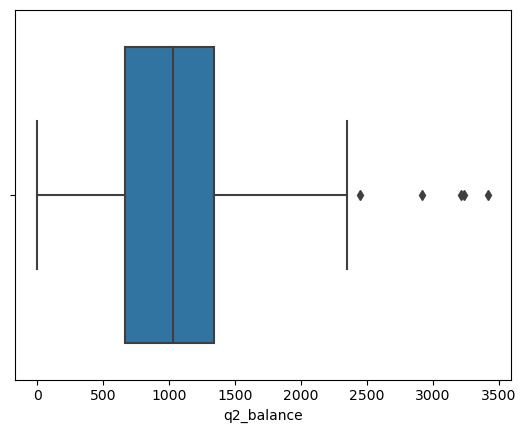

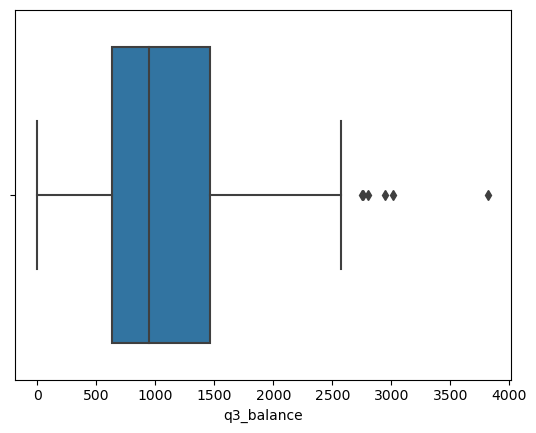

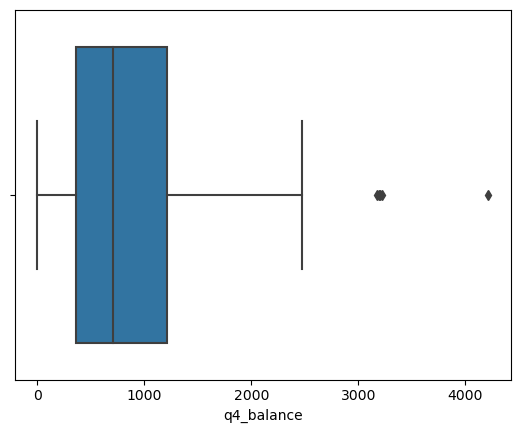

In [15]:
# Checking for outliers
for col in numerical:
    sns.boxplot(numerical[col])
    plt.show()

In [16]:
# Applying BoxCox
from scipy import stats
# boxcox is similar to log, tend to make data a bit more normally distributed and smooths outliers

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

numerical, _ci = boxcox_transform(numerical)
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,982.0,365.0


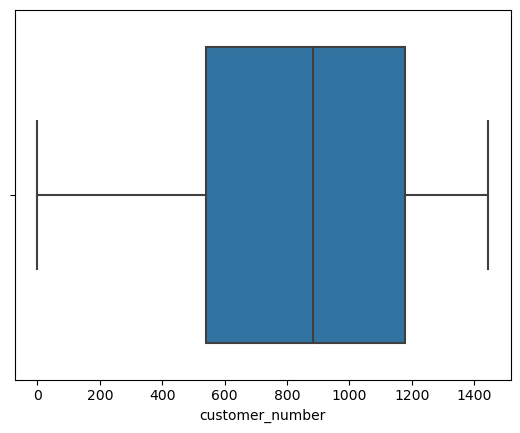

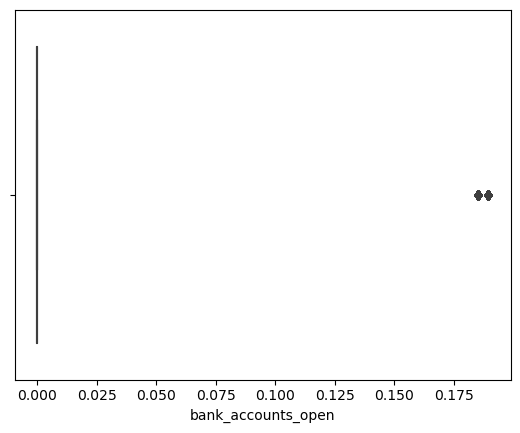

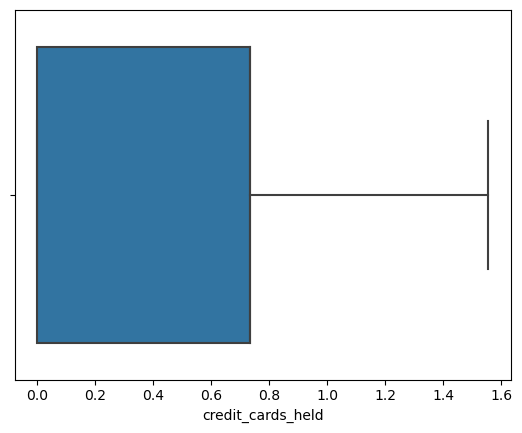

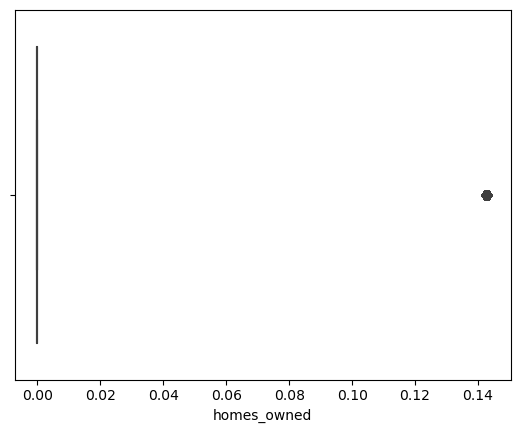

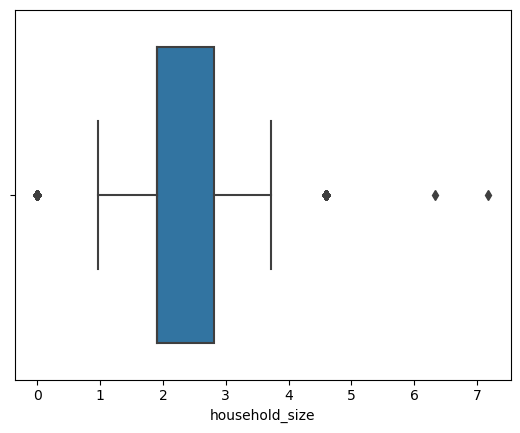

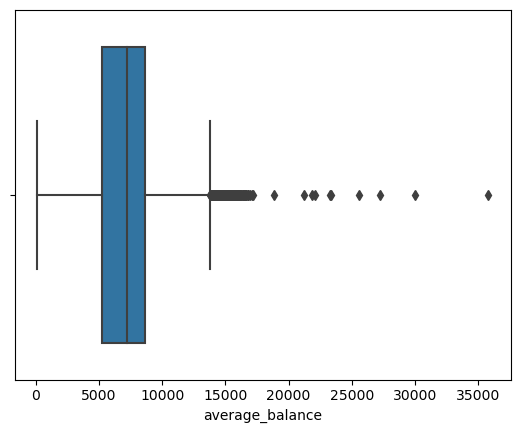

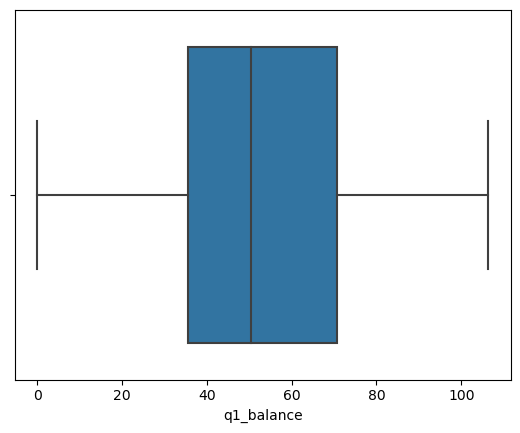

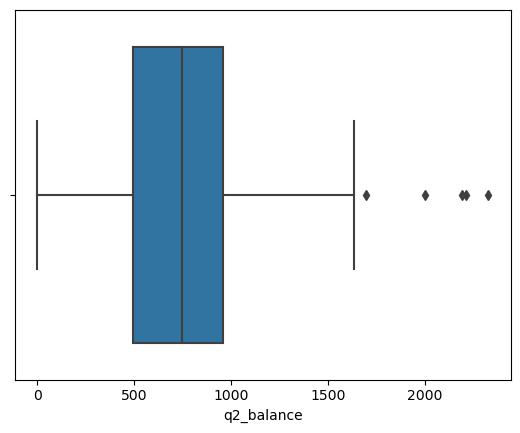

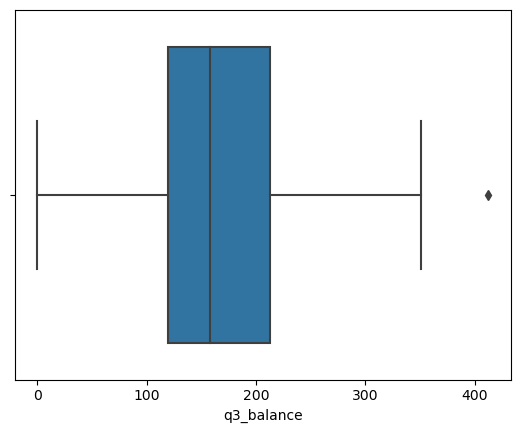

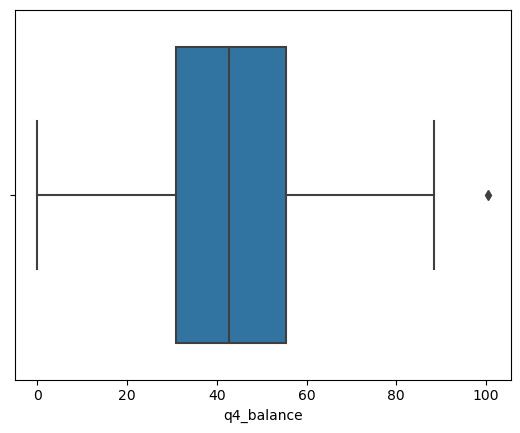

In [17]:
# Checking again
for col in numerical:
    sns.boxplot(numerical[col])
    plt.show()

### Working on Categoricals

In [19]:
categorical = data.select_dtypes('object')

In [20]:
# Checking frequency of data
# There is some imbalance
for col in categorical:
    print(categorical[col].value_counts())
    print()

No     16977
Yes     1023
Name: offer_accepted, dtype: int64

Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64

Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64

Medium    9013
High      4526
Low       4461
Name: income_level, dtype: int64

No     15322
Yes     2678
Name: overdraft_protection, dtype: int64

High      6071
Medium    5972
Low       5957
Name: credit_rating, dtype: int64

Yes    11655
No      6345
Name: own_your_home, dtype: int64



In [23]:
reward = pd.crosstab(data['reward'], data['offer_accepted'], margins=True)
mailer_type = pd.crosstab(data['mailer_type'], data['offer_accepted'], margins=True)
income_level = pd.crosstab(data['income_level'], data['offer_accepted'], margins=True)
overdraft_protection = pd.crosstab(data['overdraft_protection'], data['offer_accepted'], margins=True)
credit_rating = pd.crosstab(data['credit_rating'], data['offer_accepted'], margins=True)
own_your_home = pd.crosstab(data['own_your_home'], data['offer_accepted'], margins=True)

all_crosstabs = [crosstab_reward, crosstab_mailer_type, crosstab_income_level, crosstab_overdraft_protection, crosstab_credit_rating,
                    crosstab_own_your_home]

In [29]:
from scipy.stats import chi2_contingency

# stats, p, dof, frequencies = chi2_contingency(crosstab_reward)
# print()

for tab in all_crosstabs:
    stat, p, dof, expected = chi2_contingency(tab)
    alpha = 0.05
    if p > alpha:
        print(p)
        print('Variables are independent')
        print()
    else:
        print(p)
        print('Variables are dependent')
        print()

9.607491314312175e-20
Variables are dependent

5.983159437628008e-36
Variables are dependent

2.477958477740722e-22
Variables are dependent

0.9975177421944054
Variables are independent

1.4779715259376716e-92
Variables are dependent

0.9999996491458589
Variables are independent



In [21]:
# Splitting the data
X = pd.get_dummies(data.drop(['offer_accepted'], axis=1))
y = data['offer_accepted']

In [22]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
# Training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      3387
         Yes       0.00      0.00      0.00       213

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.48      3600
weighted avg       0.89      0.94      0.91      3600



In [24]:
# Scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Use SMOTE
from imblearn.over_sampling import SMOTE

# X = pd.get_dummies(data.drop('status', axis=1))
# y = data['status']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

No     13590
Yes    13590
Name: offer_accepted, dtype: int64

In [26]:
# Re-training the model
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      3387
         Yes       0.29      0.01      0.02       213

    accuracy                           0.94      3600
   macro avg       0.61      0.50      0.49      3600
weighted avg       0.90      0.94      0.91      3600



              precision    recall  f1-score   support

          No       0.97      0.75      0.84      3387
         Yes       0.13      0.60      0.21       213

    accuracy                           0.74      3600
   macro avg       0.55      0.67      0.53      3600
weighted avg       0.92      0.74      0.81      3600



<AxesSubplot:>

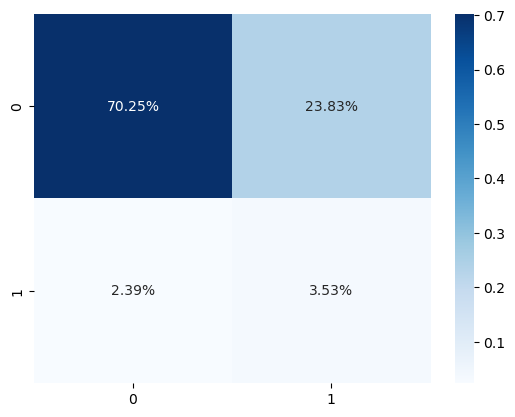

In [27]:
# Re-training the model using weights
# Printing confusion Matrix too
from sklearn.metrics import confusion_matrix
weights = {
    'Yes': 100,
    'No': 10
}

classification_w = LogisticRegression(random_state=42, max_iter=100000, class_weight=weights) # Try"; class_weight = ‘balanced’
classification_w.fit(X_train, y_train)

predictions = classification_w.predict(X_test)
print(classification_report(y_test, predictions))

cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')

## Trying KneighborsClassifier

              precision    recall  f1-score   support

          No       0.94      0.72      0.82      3387
         Yes       0.06      0.27      0.10       213

    accuracy                           0.70      3600
   macro avg       0.50      0.50      0.46      3600
weighted avg       0.89      0.70      0.78      3600



<AxesSubplot:>

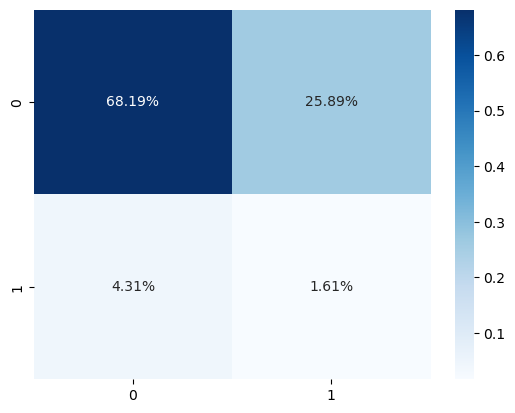

In [28]:
# KNN Behaves worse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model_knn = KNeighborsClassifier() # Choosing odd number bc nr. of classes is even

model_knn.fit(X_train, y_train)

y_predict = model_knn.predict(X_test)
print(classification_report(y_test, y_predict))

cf_matrix = confusion_matrix(y_test, y_predict, normalize='all')
sns.heatmap(cf_matrix, annot=True, fmt='.2%', cmap='Blues')